### 2. (5 pts) Binary classification with logistic regression without oversampling

#### Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##### Loading the dataset

In [2]:
heart_disease_df = pd.read_csv('/content/heart_disease_train.csv')
heart_disease_df_original = heart_disease_df.copy()
heart_disease_df_original.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0
1,1,45,3.0,0,0.0,0.0,0,0,0,162.0,125.0,89.0,27.98,85.0,83.0,0
2,0,51,1.0,1,2.0,0.0,0,0,0,261.0,127.0,81.0,20.24,75.0,96.0,0
3,1,45,3.0,1,30.0,0.0,0,0,0,250.0,126.0,89.5,28.68,75.0,92.0,0
4,0,45,2.0,1,3.0,0.0,0,0,0,250.0,130.0,80.0,20.24,90.0,86.0,0


#### Displaying first 5 rows of the data

In [3]:
heart_disease_df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0
1,1,45,3.0,0,0.0,0.0,0,0,0,162.0,125.0,89.0,27.98,85.0,83.0,0
2,0,51,1.0,1,2.0,0.0,0,0,0,261.0,127.0,81.0,20.24,75.0,96.0,0
3,1,45,3.0,1,30.0,0.0,0,0,0,250.0,126.0,89.5,28.68,75.0,92.0,0
4,0,45,2.0,1,3.0,0.0,0,0,0,250.0,130.0,80.0,20.24,90.0,86.0,0


In [4]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3306 non-null   float64
 3   currentSmoker    3390 non-null   int64  
 4   cigsPerDay       3365 non-null   float64
 5   BPMeds           3348 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3346 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3374 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3075 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 423.9 KB


##### Displaying shape of the dataframe

In [5]:
heart_disease_df.shape

(3390, 16)

There are total of 3390 instances and 16 features

As we can observe in the .info() output,  there are multiple columns with less than 3390 samples that means those columns have null values.

In [6]:
heart_disease_df['TenYearCHD'].value_counts()

,count
TenYearCHD,
0,2874
1,516


Dataset is imbalanced as observed there are only 516 samples for class '1'.

##### Printing the count of null values in each column

In [7]:
heart_disease_df.isnull().sum()

,0
gender,0
age,0
education,84
currentSmoker,0
cigsPerDay,25
BPMeds,42
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,44


From the above, we can observe that features like education, cigsPerDay, BPMeds, totChol, BMI, heartrate, glucose have the null values.

Next step is to fill all the null values. Considering to apply group based imputation (ref: https://www.kdnuggets.com/2017/09/python-data-preparation-case-files-group-based-imputation.html) for highly correlated features and for remaining features filling with median.

In [8]:
correlation_matrix = heart_disease_df.corr()
correlation_matrix

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
gender,1.000000,-0.021699,0.017740,0.197109,0.312110,-0.063121,0.000538,-0.003935,0.021348,-0.075607,-0.041278,0.057516,0.090680,-0.117163,0.017359,0.093203
age,-0.021699,1.000000,-0.156948,-0.218453,-0.186060,0.126578,0.068083,0.304355,0.110090,0.262306,0.386243,0.204637,0.142417,-0.018992,0.121737,0.215881
education,0.017740,-0.156948,1.000000,0.011334,0.003289,-0.002784,-0.032811,-0.062608,-0.044612,-0.009843,-0.113493,-0.043689,-0.122646,-0.048114,-0.033716,-0.036786
currentSmoker,0.197109,-0.218453,0.011334,1.000000,0.771015,-0.047996,-0.032615,-0.096925,-0.048919,-0.051385,-0.130769,-0.103222,-0.164121,0.057198,-0.057929,0.022754
cigsPerDay,0.312110,-0.186060,0.003289,0.771015,1.000000,-0.043402,-0.029953,-0.063781,-0.046534,-0.021426,-0.090941,-0.055125,-0.091066,0.078196,-0.067160,0.054683
BPMeds,-0.063121,0.126578,-0.002784,-0.047996,-0.043402,1.000000,0.069341,0.260374,0.066023,0.098285,0.253094,0.197538,0.090651,0.013199,0.062359,0.103217
prevalentStroke,0.000538,0.068083,-0.032811,-0.032615,-0.029953,0.069341,1.000000,0.085928,0.016710,0.008202,0.047633,0.041469,0.031158,-0.022485,0.015608,0.078652
prevalentHyp,-0.003935,0.304355,-0.062608,-0.096925,-0.063781,0.260374,0.085928,1.000000,0.072848,0.169543,0.696449,0.619885,0.292622,0.147365,0.076927,0.168354
diabetes,0.021348,0.110090,-0.044612,-0.048919,-0.046534,0.066023,0.016710,0.072848,1.000000,0.053439,0.115293,0.035596,0.077206,0.034112,0.603499,0.085651
totChol,-0.075607,0.262306,-0.009843,-0.051385,-0.021426,0.098285,0.008202,0.169543,0.053439,1.000000,0.215922,0.166074,0.117041,0.076157,0.053876,0.087134


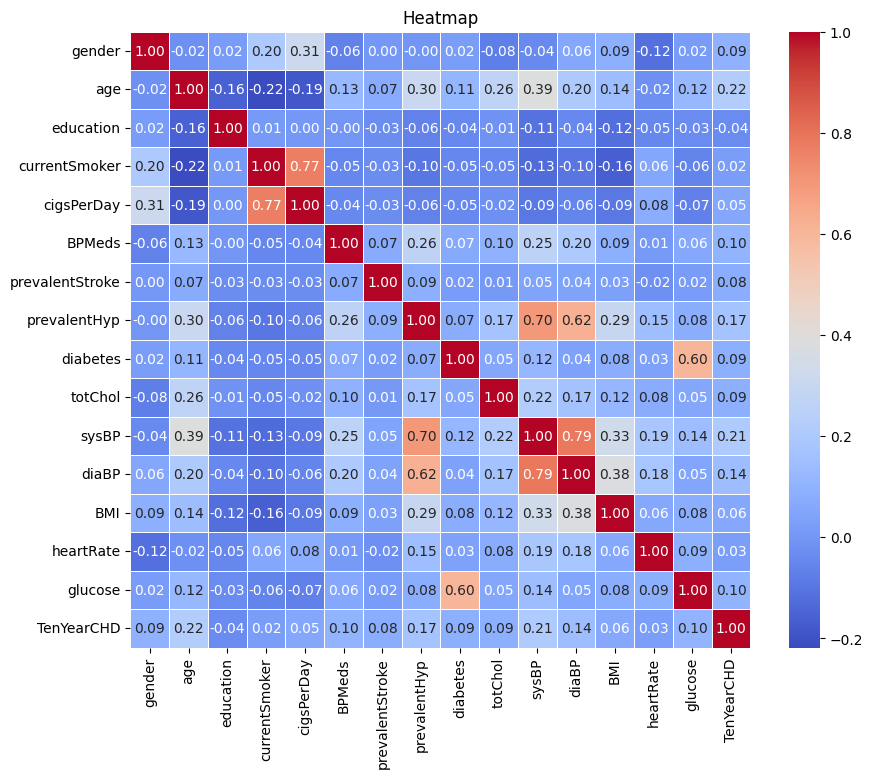

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap")
plt.show()

From the heatmap, it can be observed that cigsPerDay and CurrentSmoker are strongly positive correlated and diabetes and glucose are postively correlated. Imputing the missing values in BMI based on age and gender because in general BMI varies with age and gender. Features like education, BPMeds, totChol, heartrate doesnot show any strong correlation with other features. glucose and diabetes are positively correlated. So, the features which shows correlation with other features are imputed using group based median imputation and remaining features with median imputation.

##### Group Based Imputation

In [10]:
heart_disease_df['cigsPerDay'] = heart_disease_df['cigsPerDay'].fillna(heart_disease_df.groupby('currentSmoker')['cigsPerDay'].transform('median'))

In [11]:
heart_disease_df['glucose'] = heart_disease_df['glucose'].fillna(heart_disease_df.groupby('diabetes')['glucose'].transform('median'))

In [12]:
heart_disease_df['BMI'] = heart_disease_df['BMI'].fillna(heart_disease_df.groupby(['gender', 'age'])['BMI'].transform('median'))

In [13]:
heart_disease_df['BPMeds'] = heart_disease_df['BPMeds'].fillna(heart_disease_df['BPMeds'].median())

In [14]:
heart_disease_df['education'] = heart_disease_df['education'].fillna(heart_disease_df['education'].median())

In [15]:
heart_disease_df['totChol'] = heart_disease_df['totChol'].fillna(heart_disease_df['totChol'].median())

In [16]:
heart_disease_df['heartRate'] = heart_disease_df['heartRate'].fillna(heart_disease_df['heartRate'].median())

In [17]:
heart_disease_df.isnull().sum()

,0
gender,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


After the imputation there are no null values.

In [18]:
heart_disease_df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0
1,1,45,3.0,0,0.0,0.0,0,0,0,162.0,125.0,89.0,27.98,85.0,83.0,0
2,0,51,1.0,1,2.0,0.0,0,0,0,261.0,127.0,81.0,20.24,75.0,96.0,0
3,1,45,3.0,1,30.0,0.0,0,0,0,250.0,126.0,89.5,28.68,75.0,92.0,0
4,0,45,2.0,1,3.0,0.0,0,0,0,250.0,130.0,80.0,20.24,90.0,86.0,0


Checking the continuous values columns for outliers and then if any column has outlier, for that column will apply the logarithmic transformation.

In [19]:
heart_disease_df['BPMeds'].value_counts()

,count
BPMeds,
0.0,3295
1.0,95


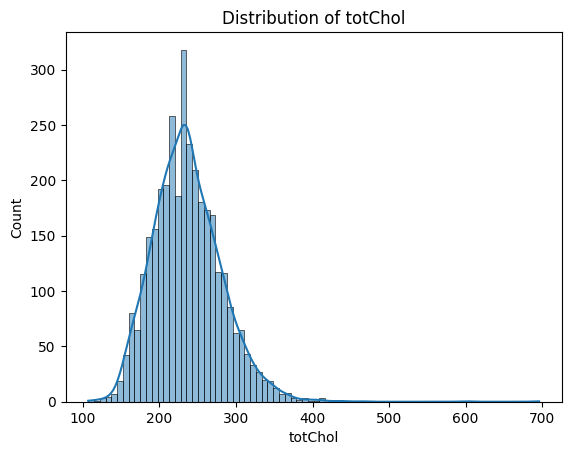

In [20]:
sns.histplot(heart_disease_df['totChol'], kde=True)
plt.title('Distribution of totChol')
plt.show()

In [21]:
Q1 = heart_disease_df['totChol'].quantile(0.25)
Q3 = heart_disease_df['totChol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = heart_disease_df[(heart_disease_df['totChol'] < lower_bound) | (heart_disease_df['totChol'] > upper_bound)]
print(outliers)

      gender  age  education  currentSmoker  cigsPerDay  BPMeds  \
86         0   60        2.0              0         0.0     0.0   
142        0   64        1.0              0         0.0     0.0   
172        0   63        1.0              0         0.0     0.0   
248        1   38        1.0              1        20.0     0.0   
468        0   56        1.0              0         0.0     0.0   
573        0   57        1.0              0         0.0     0.0   
574        0   62        1.0              0         0.0     0.0   
643        0   65        2.0              0         0.0     0.0   
684        0   57        1.0              0         0.0     1.0   
835        0   42        3.0              0         0.0     0.0   
1190       1   47        2.0              1        18.0     0.0   
1194       0   60        1.0              0         0.0     0.0   
1290       0   53        2.0              0         0.0     0.0   
1380       0   61        1.0              1        20.0     0.

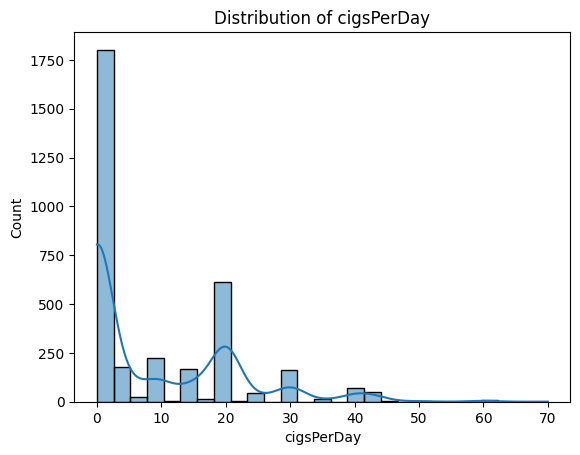

In [22]:
sns.histplot(heart_disease_df['cigsPerDay'], kde=True)
plt.title('Distribution of cigsPerDay')
plt.show()

In [23]:
Q1 = heart_disease_df['cigsPerDay'].quantile(0.25)
Q3 = heart_disease_df['cigsPerDay'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = heart_disease_df[(heart_disease_df['cigsPerDay'] < lower_bound) | (heart_disease_df['cigsPerDay'] > upper_bound)]
print(outliers)

      gender  age  education  currentSmoker  cigsPerDay  BPMeds  \
583        1   37        4.0              1        60.0     0.0   
697        1   40        3.0              1        70.0     0.0   
860        1   67        2.0              1        60.0     0.0   
1014       1   59        1.0              1        60.0     0.0   
1399       1   48        2.0              1        60.0     0.0   
1458       1   50        1.0              1        60.0     0.0   
1568       1   48        1.0              1        60.0     0.0   
1853       1   39        1.0              1        60.0     0.0   
2503       1   58        2.0              1        60.0     0.0   
2851       1   56        1.0              1        60.0     0.0   
3173       1   46        1.0              1        60.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
583                 0             0         0    254.0  122.5   82.5  23.87   
697                 0             1  

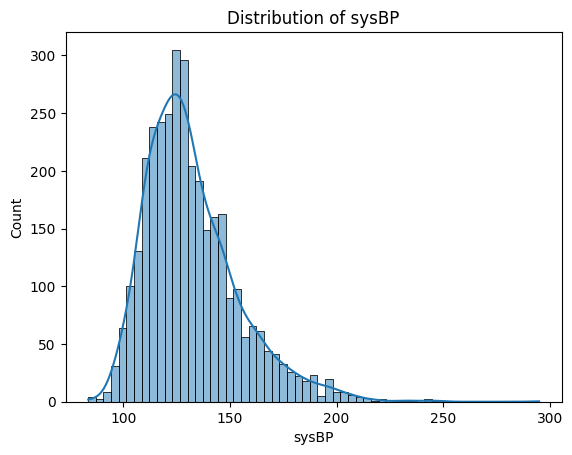

In [24]:
sns.histplot(heart_disease_df['sysBP'], kde=True)
plt.title('Distribution of sysBP')
plt.show()

In [25]:
Q1 = heart_disease_df['sysBP'].quantile(0.25)
Q3 = heart_disease_df['sysBP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = heart_disease_df[(heart_disease_df['sysBP'] < lower_bound) | (heart_disease_df['sysBP'] > upper_bound)]
print(outliers)

      gender  age  education  currentSmoker  cigsPerDay  BPMeds  \
20         0   59        3.0              1         3.0     0.0   
80         1   66        3.0              0         0.0     0.0   
211        0   61        4.0              0         0.0     0.0   
257        0   64        1.0              0         0.0     0.0   
288        1   63        1.0              0         0.0     0.0   
...      ...  ...        ...            ...         ...     ...   
3197       0   62        1.0              0         0.0     0.0   
3254       0   67        1.0              0         0.0     1.0   
3324       0   59        4.0              0         0.0     0.0   
3329       1   61        1.0              0         0.0     0.0   
3362       0   60        1.0              1        20.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
20                  0             1         0    216.0  205.0   92.5  25.86   
80                  0             1  

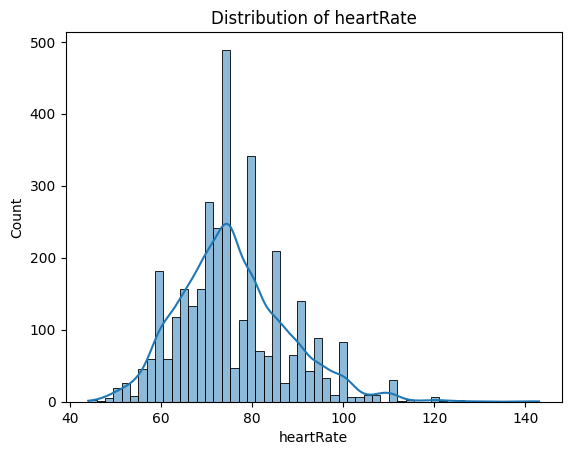

In [26]:
sns.histplot(heart_disease_df['heartRate'], kde=True)
plt.title('Distribution of heartRate')
plt.show()

In [27]:
Q1 = heart_disease_df['heartRate'].quantile(0.25)
Q3 = heart_disease_df['heartRate'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = heart_disease_df[(heart_disease_df['heartRate'] < lower_bound) | (heart_disease_df['heartRate'] > upper_bound)]
print(outliers)

      gender  age  education  currentSmoker  cigsPerDay  BPMeds  \
25         0   59        2.0              0         0.0     0.0   
40         0   52        1.0              1        20.0     1.0   
134        1   48        2.0              0         0.0     1.0   
234        0   54        1.0              0         0.0     0.0   
407        0   52        3.0              1        20.0     0.0   
...      ...  ...        ...            ...         ...     ...   
3198       0   39        3.0              0         0.0     0.0   
3269       0   53        3.0              1         9.0     0.0   
3317       1   63        1.0              0         0.0     0.0   
3330       0   48        2.0              1        20.0     0.0   
3352       1   38        4.0              1        10.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
25                  0             1         0    233.0  149.0   85.0  24.67   
40                  0             1  

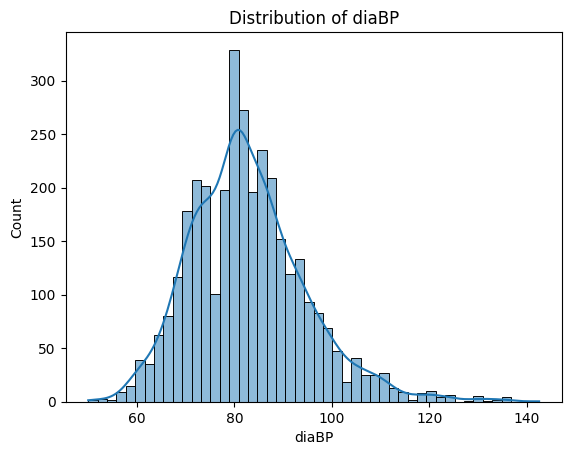

In [28]:
sns.histplot(heart_disease_df['diaBP'], kde=True)
plt.title('Distribution of diaBP')
plt.show()

In [29]:
Q1 = heart_disease_df['diaBP'].quantile(0.25)
Q3 = heart_disease_df['diaBP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = heart_disease_df[(heart_disease_df['diaBP'] < lower_bound) | (heart_disease_df['diaBP'] > upper_bound)]
print(outliers)

      gender  age  education  currentSmoker  cigsPerDay  BPMeds  \
40         0   52        1.0              1        20.0     1.0   
80         1   66        3.0              0         0.0     0.0   
211        0   61        4.0              0         0.0     0.0   
231        0   53        4.0              0         0.0     0.0   
402        1   56        1.0              0         0.0     1.0   
...      ...  ...        ...            ...         ...     ...   
3292       1   51        1.0              1        30.0     0.0   
3329       1   61        1.0              0         0.0     0.0   
3349       0   50        4.0              1        30.0     0.0   
3362       0   60        1.0              1        20.0     0.0   
3386       0   49        1.0              1        20.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
40                  0             1         0    161.0  180.0  114.0  32.52   
80                  0             1  

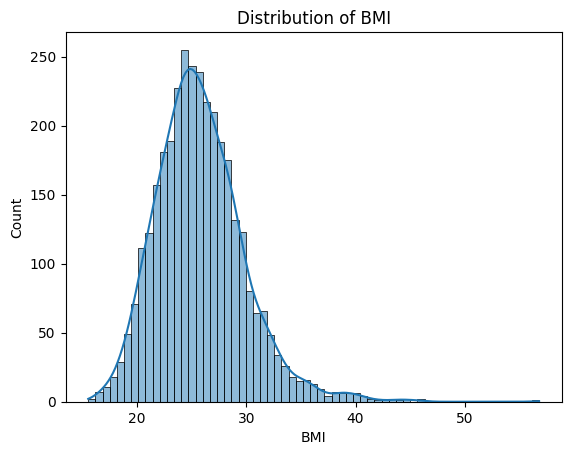

In [30]:
sns.histplot(heart_disease_df['BMI'], kde=True)
plt.title('Distribution of BMI')
plt.show()

In [31]:
Q1 = heart_disease_df['BMI'].quantile(0.25)
Q3 = heart_disease_df['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = heart_disease_df[(heart_disease_df['BMI'] < lower_bound) | (heart_disease_df['BMI'] > upper_bound)]
print(outliers)

      gender  age  education  currentSmoker  cigsPerDay  BPMeds  \
60         0   53        4.0              0         0.0     0.0   
64         0   54        2.0              1        10.0     0.0   
154        0   57        2.0              0         0.0     1.0   
207        0   63        1.0              0         0.0     0.0   
209        1   36        2.0              1        20.0     0.0   
...      ...  ...        ...            ...         ...     ...   
3296       0   54        2.0              0         0.0     0.0   
3317       1   63        1.0              0         0.0     0.0   
3325       0   62        1.0              0         0.0     0.0   
3362       0   60        1.0              1        20.0     0.0   
3386       0   49        1.0              1        20.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
60                  0             0         0    240.0  133.5   82.5  40.58   
64                  0             1  

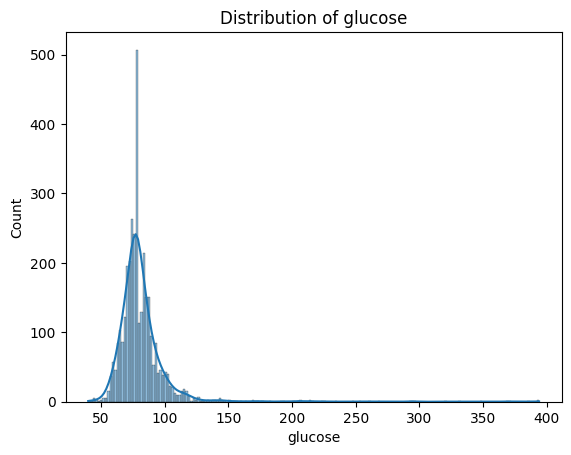

In [32]:
sns.histplot(heart_disease_df['glucose'], kde=True)
plt.title('Distribution of glucose')
plt.show()

In [33]:
Q1 = heart_disease_df['glucose'].quantile(0.25)
Q3 = heart_disease_df['glucose'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = heart_disease_df[(heart_disease_df['glucose'] < lower_bound) | (heart_disease_df['glucose'] > upper_bound)]
print(outliers)

      gender  age  education  currentSmoker  cigsPerDay  BPMeds  \
9          1   56        3.0              0         0.0     0.0   
30         1   54        1.0              1        20.0     0.0   
56         0   63        4.0              1        20.0     0.0   
68         1   48        1.0              0         0.0     0.0   
78         0   47        1.0              1        20.0     0.0   
...      ...  ...        ...            ...         ...     ...   
3238       1   51        1.0              0         0.0     0.0   
3316       0   59        2.0              1        15.0     0.0   
3317       1   63        1.0              0         0.0     0.0   
3338       0   58        1.0              0         0.0     0.0   
3362       0   60        1.0              1        20.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
9                   0             0         1    214.0  115.0   80.0  25.09   
30                  0             1  

Applying logarithmic transformation to reduce right skewness and to reduce the impact of outliers.

In [34]:
logarthmic_columns = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for i in logarthmic_columns:
    heart_disease_df[i] = np.log1p(heart_disease_df[i])
heart_disease_df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,63,1.0,0,0.000000,0.0,0,1,0,5.252273,5.003946,4.510860,3.336837,4.290459,4.465908,0
1,1,45,3.0,0,0.000000,0.0,0,0,0,5.093750,4.836282,4.499810,3.366606,4.454347,4.430817,0
2,0,51,1.0,1,1.098612,0.0,0,0,0,5.568345,4.852030,4.406719,3.055886,4.330733,4.574711,0
3,1,45,3.0,1,3.433987,0.0,0,0,0,5.525453,4.844187,4.505350,3.390473,4.330733,4.532599,0
4,0,45,2.0,1,1.386294,0.0,0,0,0,5.525453,4.875197,4.394449,3.055886,4.510860,4.465908,0


In [35]:
coloumns_norm = heart_disease_df.drop(['TenYearCHD'], axis=1).columns
normalized_df = heart_disease_df.copy()
for i in coloumns_norm:
    mean_c = heart_disease_df[i].mean()
    std_c = heart_disease_df[i].std()
    normalized_df[i] = (heart_disease_df[i] - mean_c) / std_c
normalized_df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.142689,1.554755,-0.971745,-0.973651,-0.916989,-0.169774,-0.068853,1.519824,-0.159376,-1.081942,0.801007,0.666291,0.407206,-0.252599,0.379278,0
1,1.142689,-0.535931,1.007952,-0.973651,-0.916989,-0.169774,-0.068853,-0.657777,-0.159376,-1.933380,-0.270929,0.586957,0.610467,0.818476,0.197025,0
2,-0.874871,0.160964,-0.971745,1.026759,-0.171001,-0.169774,-0.068853,-0.657777,-0.159376,0.615696,-0.170244,-0.081398,-1.511088,0.010608,0.944364,0
3,1.142689,-0.535931,1.007952,1.026759,1.414784,-0.169774,-0.068853,-0.657777,-0.159376,0.385323,-0.220388,0.626734,0.773431,0.010608,0.725651,0
4,-0.874871,-0.535931,0.018103,1.026759,0.024343,-0.169774,-0.068853,-0.657777,-0.159376,0.385323,-0.022129,-0.169493,-1.511088,1.187807,0.379278,0


Filled the missing values and normalized the variables

In [36]:
features = normalized_df.drop('TenYearCHD', axis=1).values
target = normalized_df['TenYearCHD'].values.reshape(-1, 1)

Initializing the weights and hyperparameters

In [37]:
n_smaples, n_features = features.shape
weights = np.zeros((n_features, 1))
bias = 0
learning_rate = 0.01
n_epochs = 10

Defining sigmoid function to map predictions to the proabilities

In [38]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

Defining binary cross entropy function to caculate the loss

In [39]:
def BCE_function(features, target, weights, bias):
    m = features.shape[0]
    linear_comb = np.dot(features, weights) + bias
    y_cap = sigmoid_function(linear_comb)
    cost = -(1 / m) * np.sum(target * np.log(y_cap) + (1 - target) * np.log(1 - y_cap))
    return cost

Defining gradient descent function to update the weights and bias.

In [40]:
def gradient_descent(features, target, weights, bias, learning_rate, n_epochs):
    m = features.shape[0]
    loss = []
    for i in range(n_epochs):
        linear_comb = np.dot(features, weights) + bias
        y_cap = sigmoid_function(linear_comb)
        dweight = (1 / m) * np.dot(features.T, (y_cap - target))
        dbias = (1 / m) * np.sum(y_cap - target)
        weights = weights - learning_rate*dweight
        bias = bias-learning_rate*dbias
        cost_calculation = BCE_function(features, target, weights, bias)
        loss.append(cost_calculation)
        print(f"Epoch {i + 1}/{n_epochs}, Cost: {cost_calculation:.4f}")
    return weights, bias, loss

Training the model

In [41]:
weights, bias, loss = gradient_descent(features, target, weights, bias, learning_rate, n_epochs)

Epoch 1/10, Cost: 0.6917
Epoch 2/10, Cost: 0.6903
Epoch 3/10, Cost: 0.6888
Epoch 4/10, Cost: 0.6874
Epoch 5/10, Cost: 0.6860
Epoch 6/10, Cost: 0.6846
Epoch 7/10, Cost: 0.6832
Epoch 8/10, Cost: 0.6818
Epoch 9/10, Cost: 0.6804
Epoch 10/10, Cost: 0.6791


Defining the Predict function to predict on the test dataset

In [42]:
def predict_function(features, weights, bias):
    linear_comb = np.dot(features, weights) + bias
    y_cap = sigmoid_function(linear_comb)
    return (y_cap >= 0.5).astype(int)

Defining a function to calculate metrics

In [43]:
def cal_metrics(y_ground, y_predict):
    truepositive = np.sum((y_ground == 1) & (y_predict == 1))
    truenegative = np.sum((y_ground == 0) & (y_predict == 0))
    falsepositive = np.sum((y_ground == 0) & (y_predict == 1))
    falsenegative = np.sum((y_ground == 1) & (y_predict == 0))
    if (truepositive + falsepositive) > 0:
      precision = truepositive / (truepositive + falsepositive)
    else:
      precision = 0
    accuracy = (truepositive + truenegative) / len(y_ground)
    if (truepositive + falsenegative) > 0:
      recall = truepositive / (truepositive + falsenegative)
    else:
      recall = 0
    return accuracy, precision, recall, truepositive, truenegative, falsepositive, falsenegative
y_predict = predict_function(features, weights, bias)
accuracy, precision, recall, truepositive, truenegative, falsepositive, falsenegative = cal_metrics(target, y_predict)
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Confusion Matrix: TruePositive={truepositive}, TrueNegative={truenegative}, FalsePositive={falsepositive}, FalseNegative={falsenegative}")

Accuracy: 0.827
Precision: 0.384
Recall: 0.227
Confusion Matrix: TruePositive=117, TrueNegative=2686, FalsePositive=188, FalseNegative=399


Predicting on test dataset

In [44]:
heart_disease_test_df = pd.read_csv('/content/heart_disease_test.csv')

In [45]:
heart_disease_test_df.isnull().sum()

,0
gender,0
age,0
education,21
currentSmoker,0
cigsPerDay,4
BPMeds,11
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,6


In [46]:
heart_disease_test_df['cigsPerDay'] = heart_disease_test_df['cigsPerDay'].fillna(heart_disease_test_df.groupby('currentSmoker')['cigsPerDay'].transform('median'))

In [47]:
heart_disease_test_df['glucose'] = heart_disease_test_df['glucose'].fillna(heart_disease_test_df.groupby('diabetes')['glucose'].transform('median'))

In [48]:
heart_disease_test_df['BMI'] = heart_disease_test_df['BMI'].fillna(heart_disease_test_df.groupby(['gender', 'age'])['BMI'].transform('median'))

In [49]:
heart_disease_test_df['BPMeds'] = heart_disease_test_df['BPMeds'].fillna(heart_disease_test_df['BPMeds'].median())

In [50]:
heart_disease_test_df['education'] = heart_disease_test_df['education'].fillna(heart_disease_test_df['education'].median())

In [51]:
heart_disease_test_df['totChol'] = heart_disease_test_df['totChol'].fillna(heart_disease_test_df['totChol'].median())

In [52]:
heart_disease_test_df.isnull().sum()

,0
gender,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [53]:
logarthmic_columns = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for i in logarthmic_columns:
    heart_disease_test_df[i] = np.log1p(heart_disease_test_df[i])
heart_disease_test_df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,56,1.0,0,0.000000,0.0,0,1,1,5.613128,4.919981,4.394449,3.357942,4.510860,5.351858,1
1,0,46,2.0,0,0.000000,0.0,0,0,0,5.525453,4.804021,4.406719,3.392157,4.564348,4.343805,0
2,0,52,1.0,0,0.000000,0.0,0,0,0,5.620401,4.727388,4.276666,3.283914,4.394449,4.356709,0
3,0,46,3.0,1,3.178054,0.0,0,0,0,5.655992,4.875197,4.442651,3.182212,4.454347,4.454347,0
4,1,69,1.0,1,0.693147,0.0,0,0,0,5.505332,4.820282,4.356709,3.317091,4.262680,4.406719,1


In [54]:
coloumns_norm_test = heart_disease_test_df.drop(['TenYearCHD'], axis=1).columns
normalized_test_df = heart_disease_test_df.copy()
for i in coloumns_norm:
    mean_c = heart_disease_test_df[i].mean()
    std_c = heart_disease_test_df[i].std()
    normalized_test_df[i] = (heart_disease_test_df[i] - mean_c) / std_c
normalized_test_df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,-0.835807,0.775315,-0.975564,-1.047718,-0.974490,-0.188062,-0.10351,1.379081,5.734211,0.915297,0.209581,-0.233576,0.536595,1.120294,4.789655,1
1,-0.835807,-0.411663,0.029634,-1.047718,-0.974490,-0.188062,-0.10351,-0.724266,-0.174186,0.405871,-0.531071,-0.144713,0.767522,1.461396,-0.217137,0
2,-0.835807,0.300524,-0.975564,-1.047718,-0.974490,-0.188062,-0.10351,-0.724266,-0.174186,0.957554,-1.020538,-1.086591,0.036958,0.377935,-0.153048,0
3,-0.835807,-0.411663,1.034832,0.953329,1.206125,-0.188062,-0.10351,-0.724266,-0.174186,1.164351,-0.076458,0.115516,-0.649464,0.759910,0.331902,0
4,1.195037,2.318386,-0.975564,0.953329,-0.498889,-0.188062,-0.10351,-0.724266,-0.174186,0.288957,-0.427213,-0.506901,0.260878,-0.462370,0.095343,1


In [55]:
f = normalized_test_df.drop('TenYearCHD', axis=1).values
t = normalized_test_df['TenYearCHD'].values.reshape(-1, 1)
t_pred = predict_function(f, weights, bias)
accuracy, precision, recall, truepositive, truenegative, falsepositive, falsenegative = cal_metrics(t, t_pred)
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Confusion Matrix: TruePositive={truepositive}, TrueNegative={truenegative}, FalsePositive={falsepositive}, FalseNegative={falsenegative}")

Accuracy: 0.834
Precision: 0.411
Recall: 0.234
Confusion Matrix: TruePositive=30, TrueNegative=677, FalsePositive=43, FalseNegative=98


##### Performed the same code on the balanced dataset which is in the other notebook. Applied oversampling to balance the dataset